In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
np.random.seed(42)

In [2]:
dfbackup = pd.read_csv('creditcard.csv')
df = dfbackup.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
df['normdAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [5]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normdAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
X = df.drop('Class', axis=1)
y = df[['Class']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
print(X_train.shape[0], X_test.shape[0])

199364 85443


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Model : Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dropout(0.5),
    Dense(units = 16,activation = 'relu'),
    Dense(units = 24,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
______________________________________________________

## Training

In [15]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
13291/13291 [==============================] - 13s 401us/step - loss: 0.0355 - accuracy: 0.9875
Epoch 2/10
13291/13291 [==============================] - 5s 406us/step - loss: 0.0046 - accuracy: 0.9994
Epoch 3/10
13291/13291 [==============================] - 5s 402us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 4/10
13291/13291 [==============================] - 5s 407us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/10
13291/13291 [==============================] - 5s 407us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/10
13291/13291 [==============================] - 5s 403us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/10
13291/13291 [==============================] - 5s 407us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 8/10
13291/13291 [==============================] - 5s 404us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/10
13291/13291 [==============================] - 5s 402us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 10/10
13291/13291 [====================

In [17]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 1s 289us/step - loss: 0.0046 - accuracy: 0.9994


In [18]:
print(score)

[0.004626208916306496, 0.9994499087333679]


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(classification_report(pd.DataFrame(y_test), y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.85      0.83       136

    accuracy                           1.00     85443
   macro avg       0.91      0.93      0.92     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

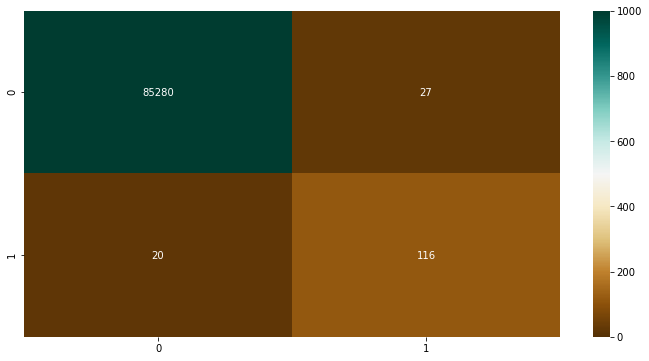

In [22]:
cm = confusion_matrix(pd.DataFrame(y_test), y_pred.round())
plt.figure(figsize=(12,6))
sns.heatmap(cm, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

In [23]:
y_pred2 = model.predict(X)
y_true2 = pd.DataFrame(y)
print(classification_report(y_true2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.85      0.82      0.83       492

    accuracy                           1.00    284807
   macro avg       0.93      0.91      0.92    284807
weighted avg       1.00      1.00      1.00    284807



<AxesSubplot:>

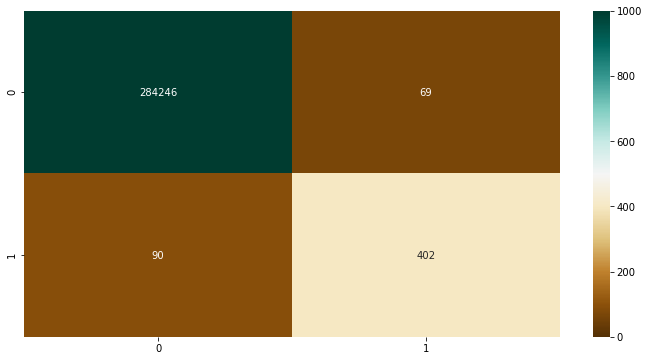

In [25]:
cm2 = pd.DataFrame(confusion_matrix(y_true2, y_pred2.round()))
plt.figure(figsize=(12,6))
sns.heatmap(cm2, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

# Model : Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier()

In [37]:
clf.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [41]:
y_pred_rf = clf.predict(X_test)

In [42]:
clf.score(X_test,y_test)

0.9995786664794073

In [52]:
print(confusion_matrix(y_test, y_pred_rf))

[[85297    10]
 [   26   110]]


In [44]:
y_pred2_rf = clf.predict(X)

In [47]:
cm3 = pd.DataFrame(confusion_matrix(y, y_pred2_rf))

<AxesSubplot:>

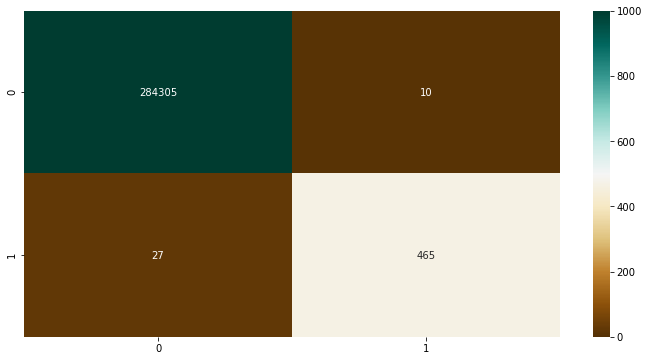

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(cm3, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

# Model : Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [51]:
y_pred_tree = tree.predict(X_test)
tree.score(X_test, y_test)

0.99916903666772

<AxesSubplot:>

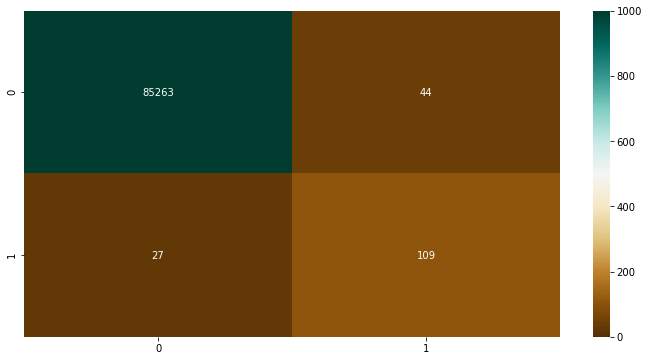

In [54]:
cm4 = pd.DataFrame(confusion_matrix(y_test, y_pred_tree))
plt.figure(figsize=(12,6))
sns.heatmap(cm4, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

<AxesSubplot:>

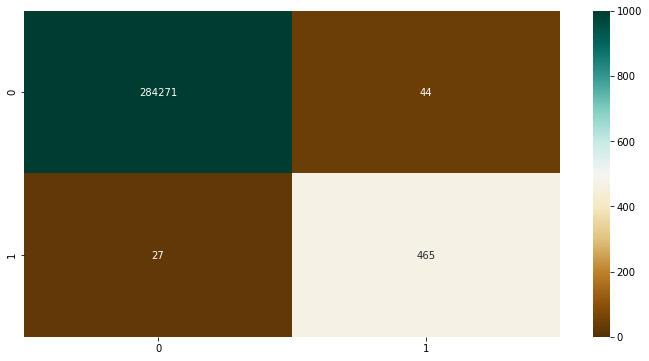

In [55]:
y_pred2_tree = tree.predict(X)
cm5 = pd.DataFrame(confusion_matrix(y, y_pred2_tree))
plt.figure(figsize=(12,6))
sns.heatmap(cm5, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

# Resampling
## Oversampling

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [58]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=.3, random_state=42, stratify=y_resample)

In [60]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
26537/26537 [==============================] - 11s 407us/step - loss: 0.0477 - accuracy: 0.9810
Epoch 2/10
26537/26537 [==============================] - 11s 411us/step - loss: 0.0133 - accuracy: 0.9965
Epoch 3/10
26537/26537 [==============================] - 11s 413us/step - loss: 0.0097 - accuracy: 0.9976
Epoch 4/10
26537/26537 [==============================] - 11s 413us/step - loss: 0.0089 - accuracy: 0.9979
Epoch 5/10
26537/26537 [==============================] - 11s 414us/step - loss: 0.0075 - accuracy: 0.9982
Epoch 6/10
26537/26537 [==============================] - 11s 408us/step - loss: 0.0069 - accuracy: 0.9984
Epoch 7/10
26537/26537 [==============================] - 11s 411us/step - loss: 0.0074 - accuracy: 0.9983
Epoch 8/10
26537/26537 [==============================] - 11s 415us/step - loss: 0.0072 - accuracy: 0.9985
Epoch 9/10
26537/26537 [==============================] - 11s 412us/step - loss: 0.0061 - accuracy: 0.9987
Epoch 10/10
26537/26537 [============

In [61]:
score = model.evaluate(X_test, y_test)
score

5331/5331 [==============================] - 2s 282us/step - loss: 0.0063 - accuracy: 0.9988


[0.006283160299062729, 0.9987983107566833]

In [62]:
y_pred = model.predict(X_test)
print(classification_report(pd.DataFrame(y_test), y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



<AxesSubplot:>

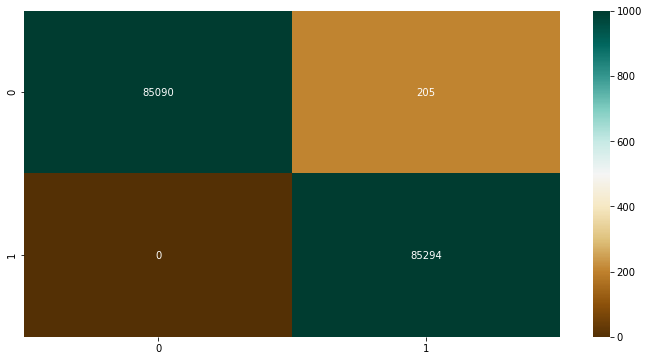

In [63]:
cm6 = confusion_matrix(pd.DataFrame(y_test), y_pred.round())
plt.figure(figsize=(12,6))
sns.heatmap(cm6, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')

In [64]:
y_pred2 = model.predict(X)
y_true2 = pd.DataFrame(y)
print(classification_report(y_true2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.43      1.00      0.60       492

    accuracy                           1.00    284807
   macro avg       0.72      1.00      0.80    284807
weighted avg       1.00      1.00      1.00    284807



<AxesSubplot:>

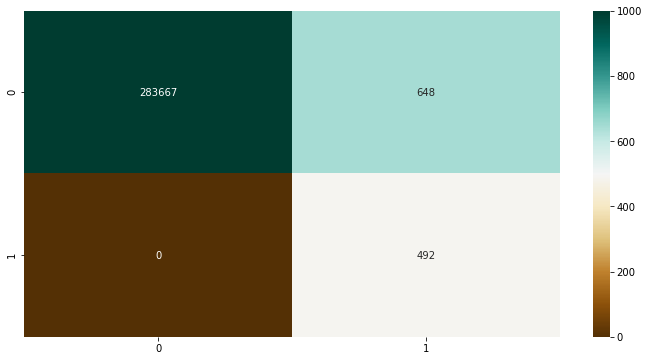

In [65]:
cm7 = pd.DataFrame(confusion_matrix(y_true2, y_pred2.round()))
plt.figure(figsize=(12,6))
sns.heatmap(cm7, vmin= 0, vmax=1000, annot=True, cmap='BrBG', fmt='g')